# Dự đoán số giờ nắng – Time series Analysis

In [3]:
sun <- c(12.2,38.9,75.4,69.0,158.0,161.7,119.9,140.9,89.4,134.9,68.8,158.7,
      119.2,31.9,14.9,13.5,181.5,120.3,133.0,107.6,137.7,134.6,86.3,87.5, 
      98.9,43.8,32.4,114.3,204.7,178.0,124.0,157.7,101.0,139.0,83.6,44.6,
      39.6,91.7,22.7,64.6,143.5,192.8,152.4,129.4,119.4,144.5,104.2,135.0,
49.7,72.9,45.6,81.7,147.9,123.9,111.6,107.6,97.9,93.7,75.1,67.6)
print(sun)

 [1]  12.2  38.9  75.4  69.0 158.0 161.7 119.9 140.9  89.4 134.9  68.8 158.7
[13] 119.2  31.9  14.9  13.5 181.5 120.3 133.0 107.6 137.7 134.6  86.3  87.5
[25]  98.9  43.8  32.4 114.3 204.7 178.0 124.0 157.7 101.0 139.0  83.6  44.6
[37]  39.6  91.7  22.7  64.6 143.5 192.8 152.4 129.4 119.4 144.5 104.2 135.0
[49]  49.7  72.9  45.6  81.7 147.9 123.9 111.6 107.6  97.9  93.7  75.1  67.6


In [4]:
print("Sun hour series: ")
sun.timeseries <- ts(sun, start=c(2013,1), frequency=12)
sun.timeseries

[1] "Sun hour series: "


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,12.2,38.9,75.4,69.0,158.0,161.7,119.9,140.9,89.4,134.9,68.8,158.7
2014,119.2,31.9,14.9,13.5,181.5,120.3,133.0,107.6,137.7,134.6,86.3,87.5
2015,98.9,43.8,32.4,114.3,204.7,178.0,124.0,157.7,101.0,139.0,83.6,44.6
2016,39.6,91.7,22.7,64.6,143.5,192.8,152.4,129.4,119.4,144.5,104.2,135.0
2017,49.7,72.9,45.6,81.7,147.9,123.9,111.6,107.6,97.9,93.7,75.1,67.6


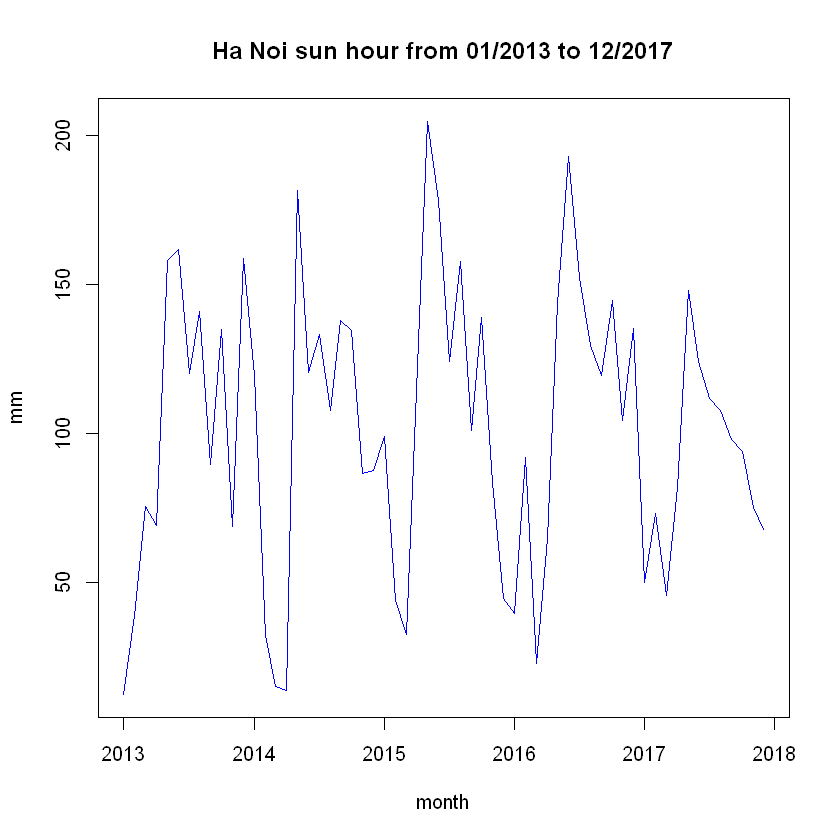

In [6]:
plot.ts(sun.timeseries, main="Ha Noi sun hour from 01/2013 to 12/2017",
       ylab="mm",xlab="month",col="blue")

**Nhận xét:**

Có thể thấy biểu đồ này mang tính theo mùa: số giờ nắng tăng vọt từ khoảng giữa năm (tháng 5,6,7,8) giảm vào cuối năm đến đầu năm (tháng 9 đến tháng 1,2).

## Forecast time

#### Dự đoán bằng Simple Exponential Smoothing

In [7]:
forecast.sunhour = HoltWinters(sun.timeseries, beta=F,gamma=F)

In [8]:
forecast.sunhour

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = sun.timeseries, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.6904913
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 71.93907

Khi dự đoán bằng Simple exponential smoothing (SES) và không thêm yếu tố seasonal, alpha = 0.69 cho thấy trọng số của số liệu trước đó cao.

Yếu tố sau và yếu tố trước có giá trị cộng hưởng là ~72.

In [11]:
print(paste("Tong binh phuong sai so: "))
forecast.sunhour$SSE

[1] "Tong binh phuong sai so: "


[1] 136919.2

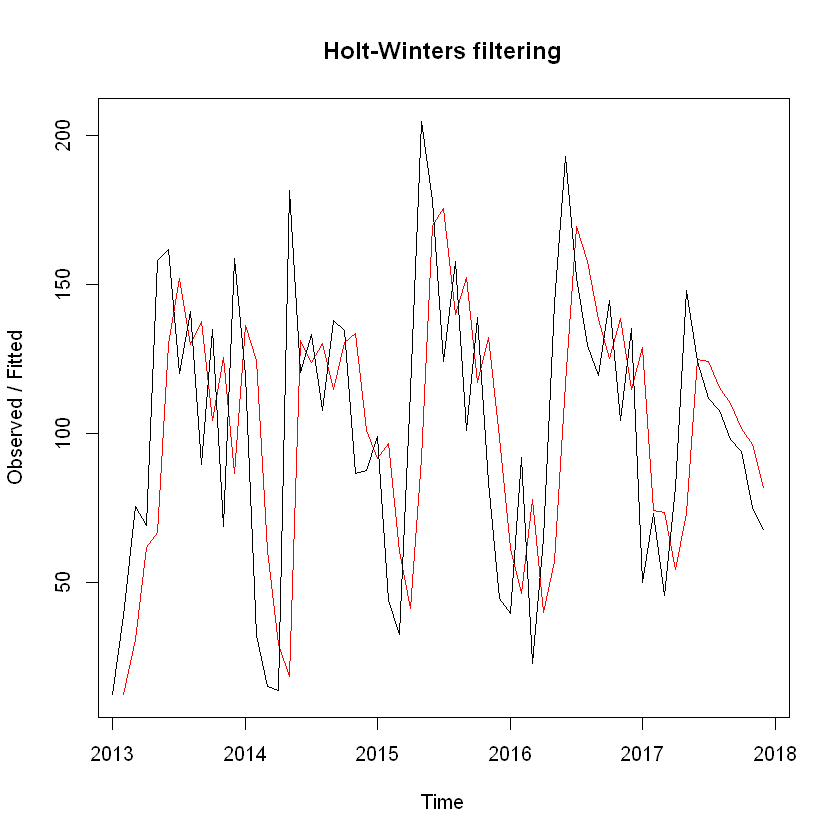

In [12]:
plot(forecast.sunhour)

Biểu đồ trên cho thấy dự đoán của HoltWinters so với dữ liệu gốc có sai lệch nhiều.

SSE lớn (136919.171582805) so với dữ liệu.

**Dự đoán số giờ nắng cho 6 tháng tiếp theo.**

In [13]:
library("forecast")

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [14]:
forecast.sunhour.new = forecast:::forecast.HoltWinters(forecast.sunhour, h=6)

In [15]:
forecast.sunhour.new

         Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
Jan 2018       71.93907   9.701457 134.1767  -23.24514 167.1233
Feb 2018       71.93907  -3.693797 147.5719  -43.73142 187.6096
Mar 2018       71.93907 -15.050243 158.9284  -61.09960 204.9777
Apr 2018       71.93907 -25.086446 168.9646  -76.44865 220.3268
May 2018       71.93907 -34.177662 178.0558  -90.35247 234.2306
Jun 2018       71.93907 -42.549231 186.4274 -103.15568 247.0338

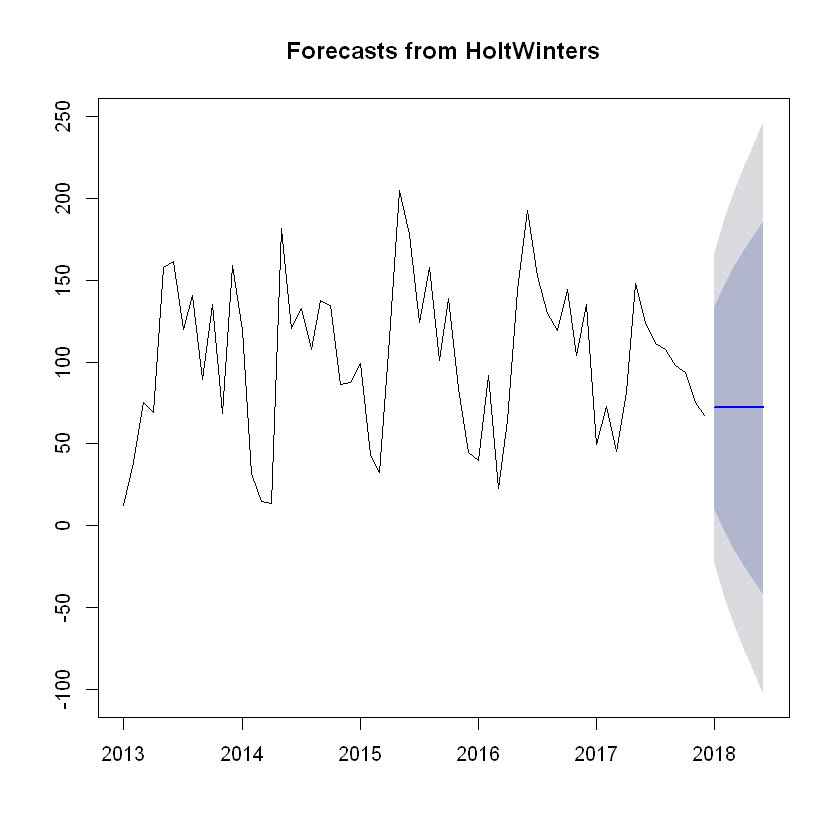

In [16]:
plot(forecast.sunhour.new)

Biểu đồ vẽ phần dự đoán màu xanh dương, còn khoảng tin cậy 80% đến 95% là vùng màu xám. Khoảng tin cậy có giá trị quá chênh lệch so với dự liệu gốc --> SES không phải là phương pháp thích hợp với dự liệu này.

#### Dự đoán bằng Holt Exponential Smoothing (HES)

In [17]:
HES.forecast = HoltWinters(log(sun.timeseries), gamma=F)

In [18]:
HES.forecast

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = log(sun.timeseries), gamma = F)

Smoothing parameters:
 alpha: 0.9214247
 beta : 0.2006616
 gamma: FALSE

Coefficients:
         [,1]
a  4.21903835
b -0.06549654

**Nhận xét:**

* alpha = 0.92 cao: cho thấy giá trị hiện tại có trọng số khá cao trong việc dự đoán giá trị tương lai
* beta = 0.2 thấp: cho thấy độ dốc của trend không được cập nhật trong thời gian qua

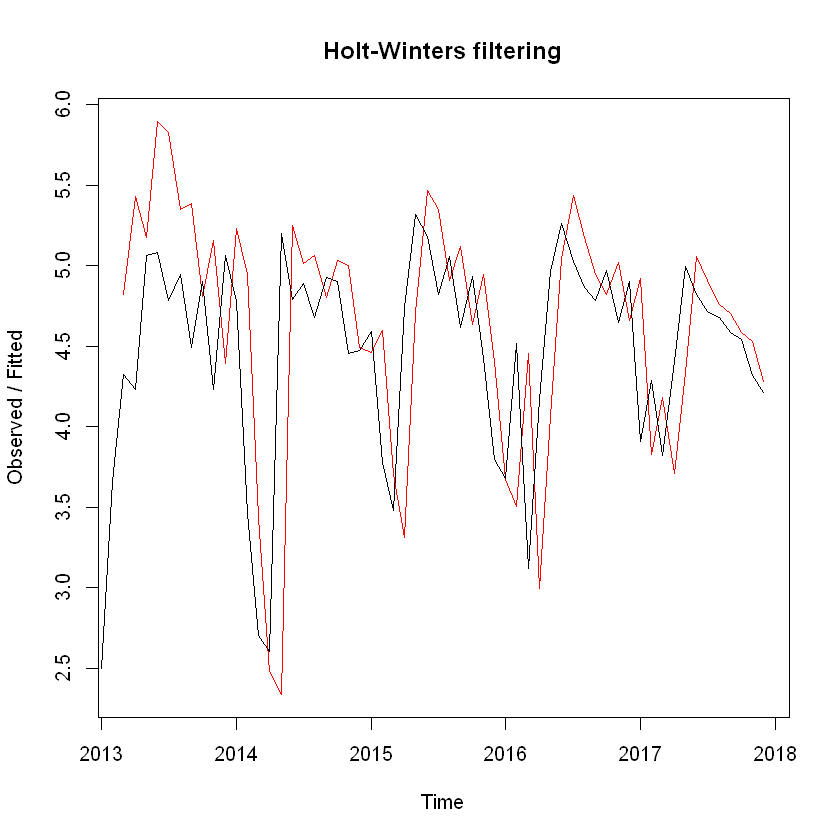

In [19]:
plot(HES.forecast)

In [20]:
HES.forecast$SSE

[1] 30.08765

Tổng sai số bình phương SSE tương đối nhỏ so với dữ liệu. Biểu đồ dự đoán của HES cho thấy giá trị dự đoán trước năm 2014 lệch nhiều so với dữ liệu gốc.

In [21]:
HES.forecast.new = forecast:::forecast.HoltWinters(HES.forecast,h=6)

In [22]:
HES.forecast.new

         Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
Jan 2018       4.153542 3.2342355 5.072848  2.7475841 5.559500
Feb 2018       4.088045 2.7170940 5.458997  1.9913562 6.184734
Mar 2018       4.022549 2.2091193 5.835978  1.2491477 6.795950
Apr 2018       3.957052 1.6921098 6.221995  0.4931218 7.420983
May 2018       3.891556 1.1599622 6.623149 -0.2860560 8.069167
Jun 2018       3.826059 0.6102815 7.041837 -1.0920484 8.744167

Dữ liệu dự đoán giảm dần từ tháng 1 đến tháng 6, tuy nhiên trong thực tế, số giờ nắng có thể tăng giảm khác giữa tháng sau và tháng trước. 

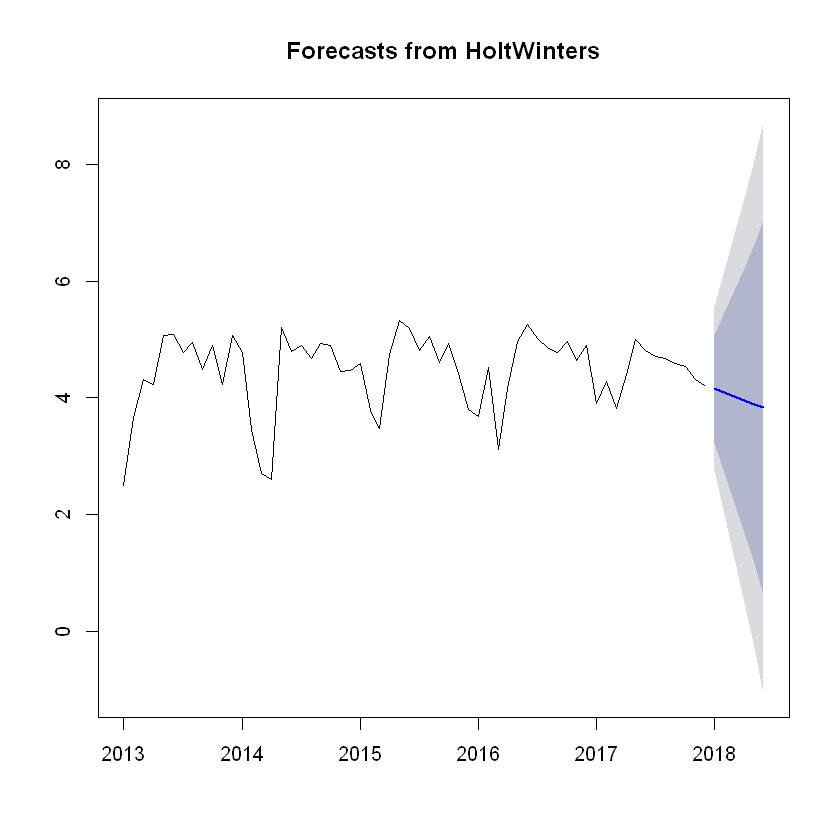

In [23]:
plot(HES.forecast.new)

Khoảng tin cậy có giá trị lệch nhiều sao với giá trị gốc -> HES không phải là phương pháp thích hợp cho dữ liệu này

#### Dự đoán bằng Holt Exponential Smoothing (HES) với yếu tố mùa

In [24]:
HWES.forecast = HoltWinters(log(sun.timeseries))

In [25]:
HWES.forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(sun.timeseries))

Smoothing parameters:
 alpha: 0.2226797
 beta : 0
 gamma: 0.8322618

Coefficients:
           [,1]
a    4.09972980
b   -0.02186668
s1  -0.50165997
s2  -0.04751143
s3  -0.72633246
s4  -0.08473686
s5   0.59414180
s6   0.56282978
s7   0.46526646
s8   0.43975576
s9   0.34653751
s10  0.40106389
s11  0.16810644
s12  0.12920912

Hệ số nhỏ trong từ tháng 11 đến tháng 3, hệ số cao từ tháng 5 đến tháng 10

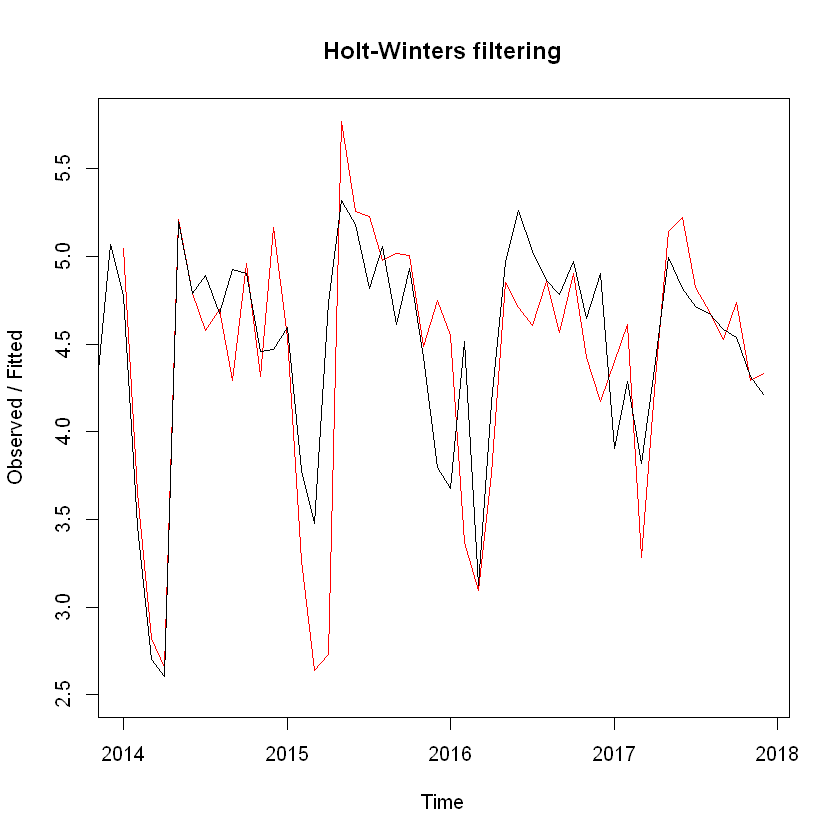

In [26]:
plot(HWES.forecast)

Giá trị dự đoán có biên độ từng năm giảm dần theo thời gian, với biên độ năm 2015 lớn hơn năm 2016. Dự đoán năm 2015 có chênh lệch lớn so với dữ liệu gốc, do trên thực tế, biên độ giờ nắng của năm 2015 nhỏ hơn của năm 2016.

In [27]:
HWES.forecast$SSE

[1] 11.88888

In [28]:
HWES.forecast.new = forecast:::forecast.HoltWinters(HWES.forecast, h=6)

In [29]:
HWES.forecast.new

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       3.576203 2.935782 4.216625 2.596763 4.555643
Feb 2018       4.008485 3.352377 4.664593 3.005055 5.011915
Mar 2018       3.307797 2.636370 3.979224 2.280938 4.334656
Apr 2018       3.927526 3.241121 4.613931 2.877761 4.977292
May 2018       4.584538 3.883475 5.285601 3.512355 5.656721
Jun 2018       4.531359 3.815939 5.246780 3.437219 5.625500

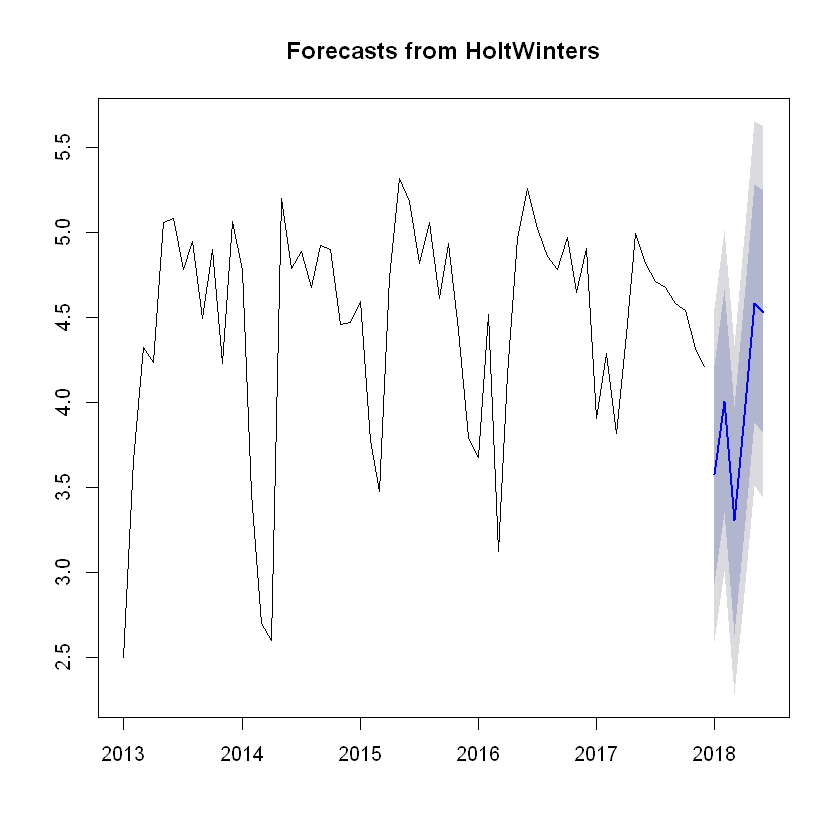

In [30]:
plot(HWES.forecast.new)

Khoảng tin cậy từ 2.5 đến 5.5 (log).

Chuyển đồi từ giá trị log về giá trị thường.

In [31]:
x = data.frame(HWES.forecast.new)

In [32]:
x

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2018,3.576203,2.935782,4.216625,2.596763,4.555643
Feb 2018,4.008485,3.352377,4.664593,3.005055,5.011915
Mar 2018,3.307797,2.636370,3.979224,2.280938,4.334656
Apr 2018,3.927526,3.241121,4.613931,2.877761,4.977292
May 2018,4.584538,3.883475,5.285601,3.512355,5.656721
Jun 2018,4.531359,3.815939,5.246780,3.437219,5.625500


In [35]:
x$Forecast = exp(x$Point.Forecast)

In [36]:
x

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,Forecast
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2018,3.576203,2.935782,4.216625,2.596763,4.555643,35.73759
Feb 2018,4.008485,3.352377,4.664593,3.005055,5.011915,55.06339
Mar 2018,3.307797,2.636370,3.979224,2.280938,4.334656,27.32487
Apr 2018,3.927526,3.241121,4.613931,2.877761,4.977292,50.78120
May 2018,4.584538,3.883475,5.285601,3.512355,5.656721,97.95794
Jun 2018,4.531359,3.815939,5.246780,3.437219,5.625500,92.88475


Kết quả dự báo lượng mưa ở cột Forecast cho thấy lượng mưa thấp vào tháng 1,2,3 và tăng cao vào tháng 5,6.